## About The Data



### Mushroom Hunting: Edible or Poisonous?

Data Source: [Mushroom dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom)

This dataset contains detailed descriptions of hypothetical samples representing 23 species of gilled mushrooms belonging to the Agaricus and Lepiota families (pp. 500-525). Each species is categorized as either definitely edible, definitely poisonous, or of unknown edibility and not recommended for consumption. The latter category is grouped with the poisonous class. The guide emphasizes that there is no straightforward rule to determine mushroom edibility—unlike the "leaflets three, let it be" rule for Poison Oak and Ivy.

In [35]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
import pickle

In [36]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [37]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [38]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

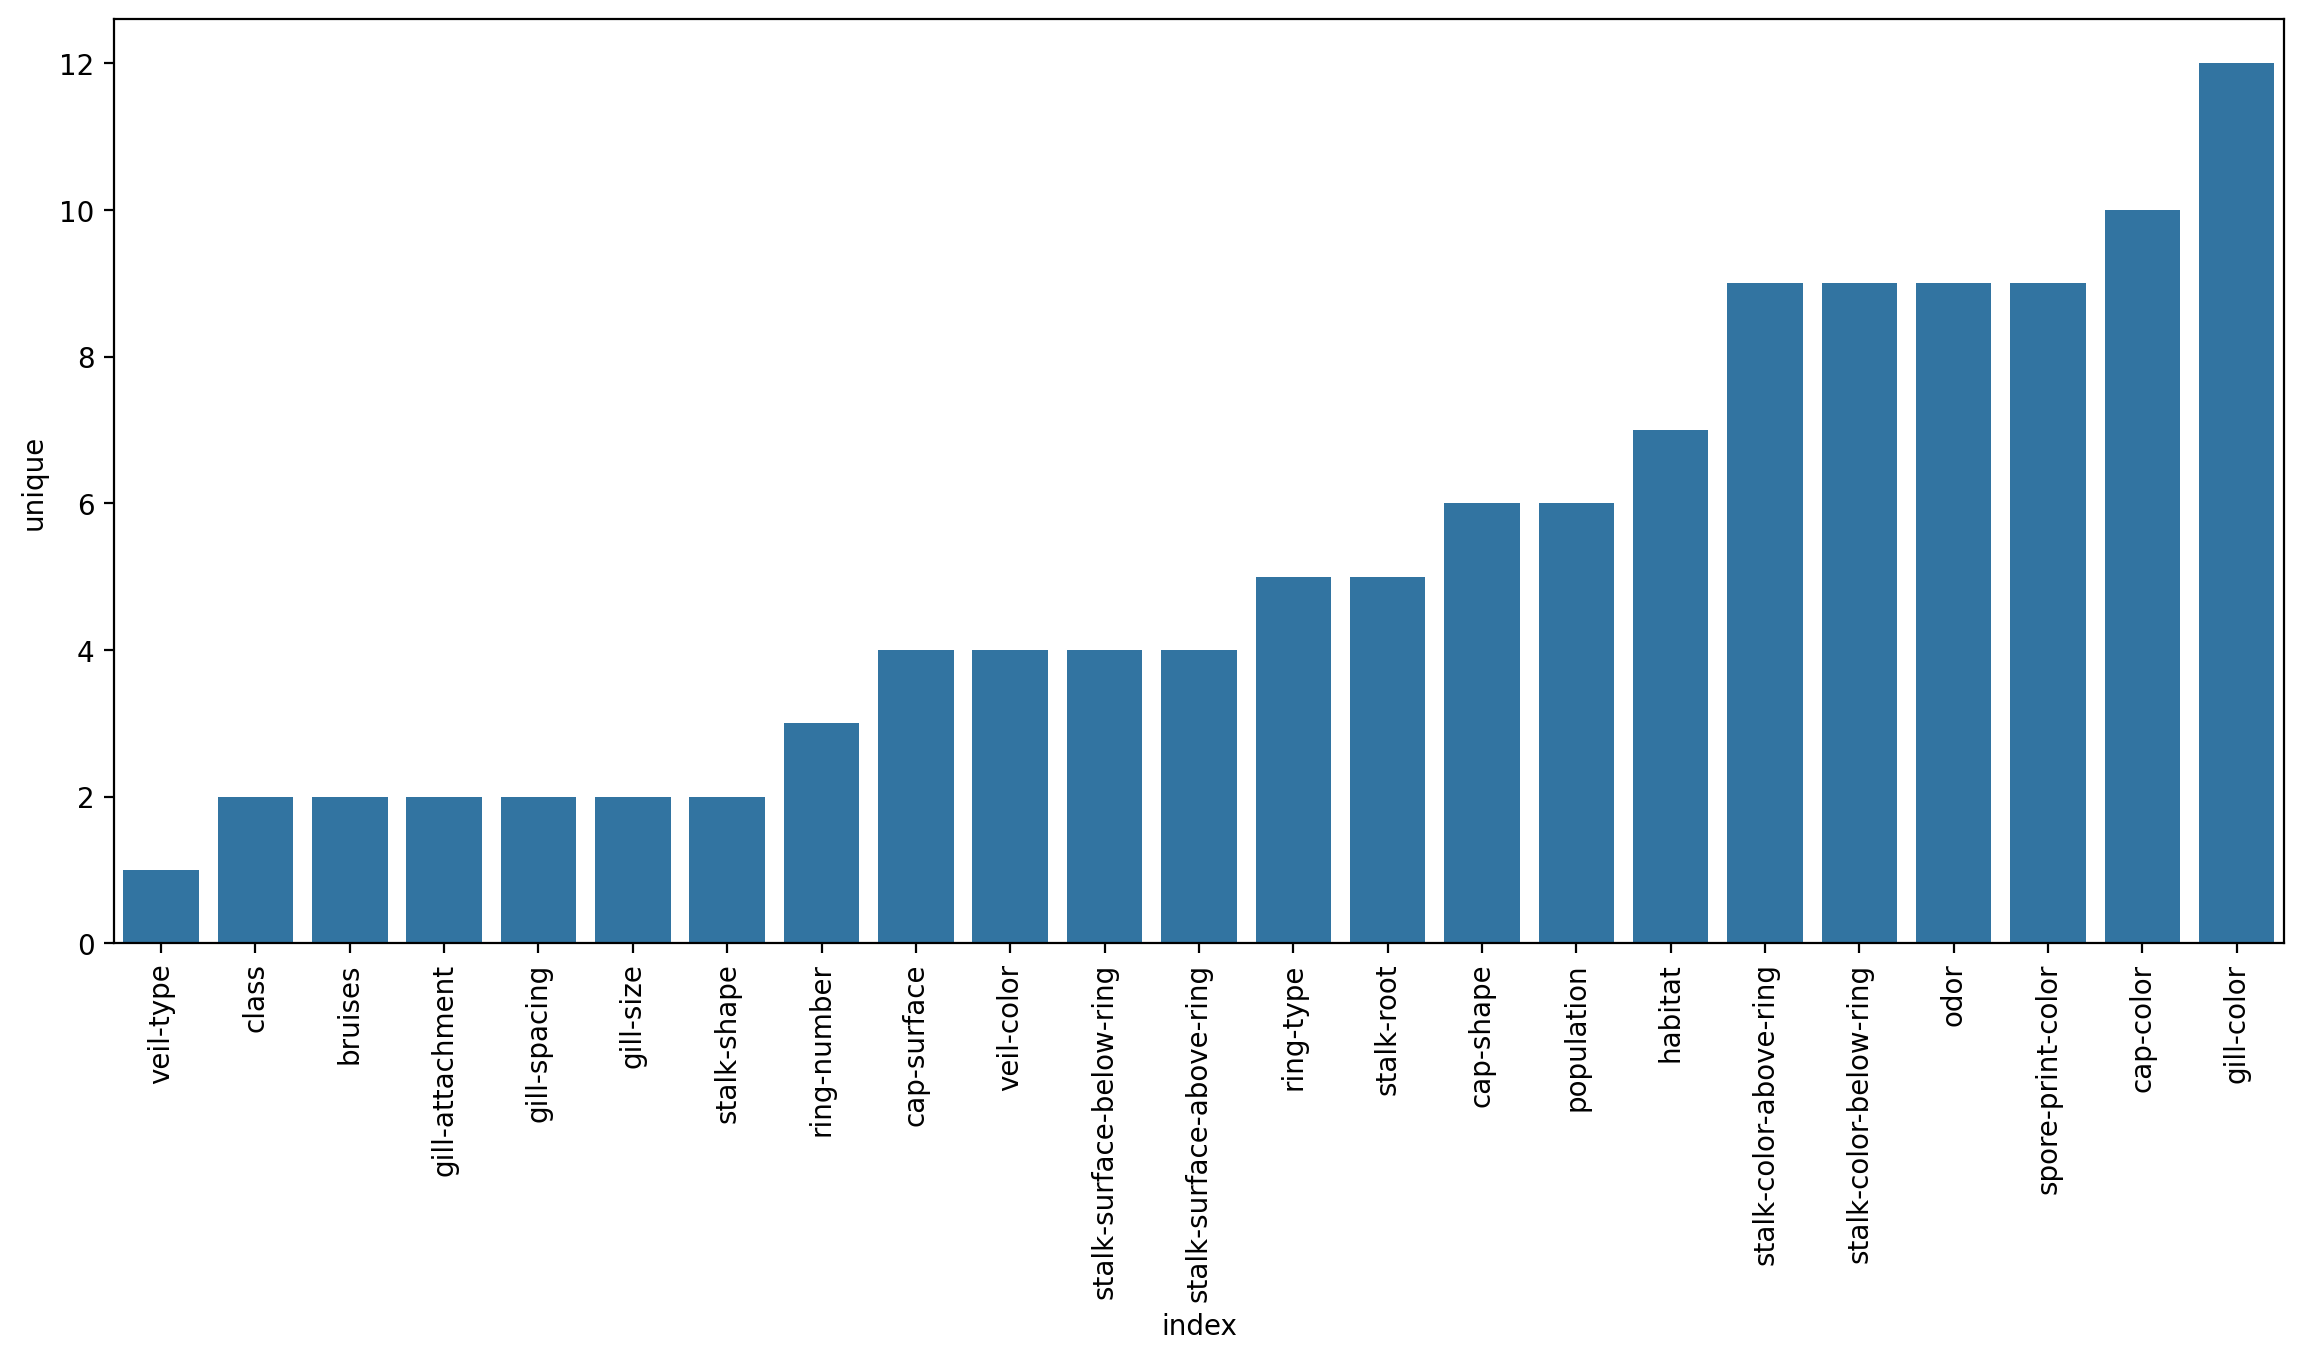

In [40]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [41]:
X = df.drop('class',axis=1) #defining the parameters as everything except the target variable
y = df['class'] #defining the target variable

In [42]:
X.shape

(8124, 22)

In [43]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [44]:
y.shape

(8124,)

## 3.2 Pre-processing

In [45]:
ohe = OneHotEncoder()

X =  ohe.fit_transform(X).toarray() #no need to define a X_cat since all the parameters are already categories
X = pd.DataFrame(X, columns=ohe.get_feature_names_out()) #separate all the feature names into different columns of 0, and 1

X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y = y.apply(lambda x: 1 if x == 'p' else 0)
y = y.rename('poisonous')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [48]:
rf = RandomForestClassifier(n_estimators = 50, random_state= 42)

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

In [50]:
gs = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    refit=True
)

gs.fit(X_train, y_train)


model = gs.best_estimator_

<ipython-input-63-d679163fa5ea>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


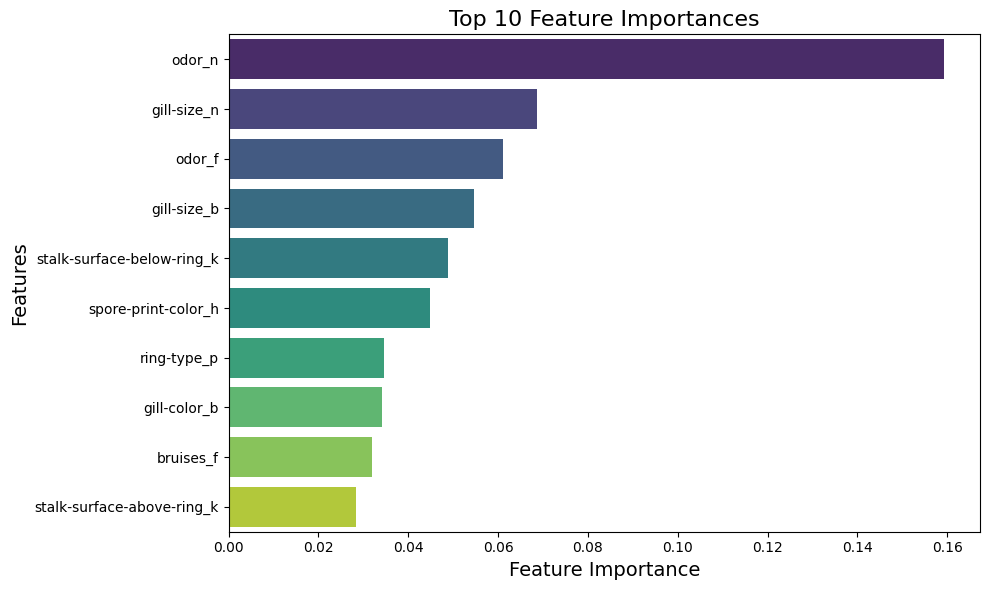

In [63]:
# Extract feature importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.feature_importances_
features = X_train.columns

# Create DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_features = importance_df.head(10)['Feature'].tolist()

# Filter the dataset to include only the top features
X_train = X_train[top_features]
X_test = X_test[top_features]

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.tight_layout()
plt.show()


In [64]:
# Re-train the model with the top 10 features
gs.fit(X_train, y_train)
model = gs.best_estimator_

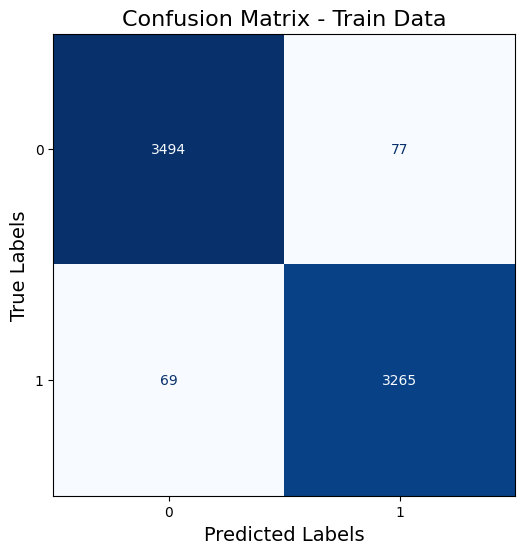

Train Metrics:
Precision: 0.98
Accuracy: 0.98
Recall: 0.98
F1 Score: 0.98


In [65]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_predict_train = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_predict_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax, colorbar=False)

plt.title("Confusion Matrix - Train Data", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.grid(False)
plt.show()

# Metrics
precision_train = precision_score(y_train, y_predict_train)
accuracy_train = accuracy_score(y_train, y_predict_train)
recall_train = recall_score(y_train, y_predict_train)
f1_train = f1_score(y_train, y_predict_train)

print("Train Metrics:")
print(f"Precision: {precision_train:.2f}")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

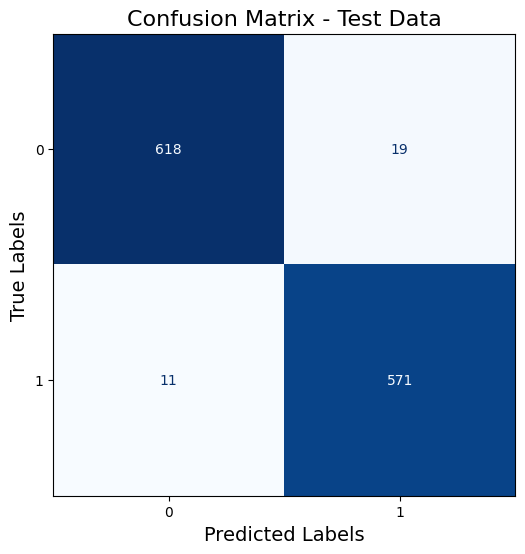

Test Metrics:
Precision: 0.97
Accuracy: 0.98
Recall: 0.98
F1 Score: 0.97


In [66]:
y_predict_test = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_predict_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax, colorbar=False)

plt.title("Confusion Matrix - Test Data", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.grid(False)
plt.show()

# Metrics
precision_test = precision_score(y_test, y_predict_test)
accuracy_test = accuracy_score(y_test, y_predict_test)
recall_test = recall_score(y_test, y_predict_test)
f1_test = f1_score(y_test, y_predict_test)

print("Test Metrics:")
print(f"Precision: {precision_test:.2f}")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")


In [67]:
# Save the model
with open("assignment.pkl", "wb") as file:
    pickle.dump(model, file)

# Save the feature importance
importance_df.to_csv("feature_importance.csv", index=False)
